## QUELVIN

DS 52 Regional Volatility & Inequality Analysis
Member Assigned - DAHILAN, Quelvin Ross

Task Description: Measure volatility using standard deviation and coefficient of variation of growth rates. Compute inequality indicator (Top 3 regional share or Gini index).

Expected Outputs:
Volatility table (Std Dev & CV)
Inequality metric table
Boxplot of regional distribution
Interpretation of volatility and inequality

In [22]:
import pandas as pd
from pathlib import Path

# Robust BASE_DIR resolution for notebook and script contexts.
try:
    BASE_DIR = Path(__file__).resolve().parents[2]
except NameError:
    cwd = Path.cwd().resolve()
    if (cwd / "03_Cleaned_Data").exists():
        BASE_DIR = cwd
    elif (cwd.parent / "03_Cleaned_Data").exists():
        BASE_DIR = cwd.parent
    elif len(cwd.parents) > 1 and (cwd.parents[1] / "03_Cleaned_Data").exists():
        BASE_DIR = cwd.parents[1]
    else:
        BASE_DIR = cwd.parents[1] if len(cwd.parents) > 1 else cwd

CLEAN_DIR = BASE_DIR / "03_Cleaned_Data"
OUT_TABLES = BASE_DIR / "outputs" / "tables"
OUT_FIGS = BASE_DIR / "outputs" / "figures"

OUT_TABLES.mkdir(parents=True, exist_ok=True)
OUT_FIGS.mkdir(parents=True, exist_ok=True)

print(f"BASE_DIR: {BASE_DIR}")
print(f"CLEAN_DIR exists: {CLEAN_DIR.exists()}")
print(f"OUT_TABLES: {OUT_TABLES}")
print(f"OUT_FIGS: {OUT_FIGS}")

BASE_DIR: D:\Quelvin's Files\DATA SCIENCE
CLEAN_DIR exists: True
OUT_TABLES: D:\Quelvin's Files\DATA SCIENCE\outputs\tables
OUT_FIGS: D:\Quelvin's Files\DATA SCIENCE\outputs\figures


In [23]:
# ==========================================================
# VALIDATION
# ==========================================================
df1 = pd.read_csv(CLEAN_DIR / "Dataset 1 Regional_Economic_Magnitude (CLEANED).csv")

print("Shape:", df1.shape)
print("Regions:", df1["Region"].nunique())
print("Year range:", df1["Year"].min(), "-", df1["Year"].max())
display(df1.head())

Shape: (806, 4)
Regions: 17
Year range: 2000 - 2024


,Region,Year,Price_Type,Total_GRDP
0,Bangsamoro Autonomous Region in Muslim Mindanao,2000,At Constant 2018 Prices,98017851.0
1,Bangsamoro Autonomous Region in Muslim Mindanao,2000,At Current Prices,45671649.0
2,Bangsamoro Autonomous Region in Muslim Mindanao,2001,At Constant 2018 Prices,94136902.0
3,Bangsamoro Autonomous Region in Muslim Mindanao,2001,At Current Prices,44751362.0
4,Bangsamoro Autonomous Region in Muslim Mindanao,2002,At Constant 2018 Prices,105745055.0


In [24]:
from IPython.display import display
inequality_metrics = df1.groupby(["Year", "Price_Type"])["Total_GRDP"].agg(
    Minimum="min",
    Maximum="max",
    Mean="mean",
    Standard_Deviation="std"
).reset_index()

inequality_metrics["Range"] = inequality_metrics["Maximum"] - inequality_metrics["Minimum"]
inequality_metrics["Coefficient_of_Variation"] = (
    (inequality_metrics["Standard_Deviation"] / inequality_metrics["Mean"]) * 100
)

print("Inequality Metrics for Regional GRDP:")
display(inequality_metrics.round(2))

inequality_metrics.to_csv(OUT_TABLES / "DS52_Inequality_Metrics_for_Regional_GRDP.csv", index=False)

print("Saved tables to:", OUT_TABLES)
print(inequality_metrics)

Inequality Metrics for Regional GRDP:


,Year,Price_Type,Minimum,Maximum,Mean,Standard_Deviation,Range,Coefficient_of_Variation
0,2000,At Constant 2018 Prices,96921630.0,2.416392e+09,4.276078e+08,5.863182e+08,2.319470e+09,137.12
1,2000,At Current Prices,45671649.0,1.237451e+09,2.254444e+08,3.048948e+08,1.191779e+09,135.24
2,2001,At Constant 2018 Prices,94136902.0,2.483505e+09,4.405618e+08,6.025857e+08,2.389368e+09,136.78
3,2001,At Current Prices,44751362.0,1.349241e+09,2.455686e+08,3.344517e+08,1.304489e+09,136.19
4,2002,At Constant 2018 Prices,105745055.0,2.507172e+09,4.568500e+08,6.096466e+08,2.401427e+09,133.45
5,2002,At Current Prices,53170834.0,1.435447e+09,2.653576e+08,3.551994e+08,1.382277e+09,133.86
6,2003,At Constant 2018 Prices,110826733.0,2.624052e+09,4.800777e+08,6.378708e+08,2.513226e+09,132.87
7,2003,At Current Prices,57745738.0,1.545712e+09,2.877959e+08,3.843339e+08,1.487966e+09,133.54
8,2004,At Constant 2018 Prices,119223129.0,2.841838e+09,5.117401e+08,6.883346e+08,2.722615e+09,134.51
9,2004,At Current Prices,71276682.0,1.743577e+09,3.248650e+08,4.319356e+08,1.672300e+09,132.96


Saved tables to: D:\Quelvin's Files\DATA SCIENCE\outputs\tables
    Year               Price_Type      Minimum       Maximum          Mean  \
0   2000  At Constant 2018 Prices   96921630.0  2.416392e+09  4.276078e+08   
1   2000        At Current Prices   45671649.0  1.237451e+09  2.254444e+08   
2   2001  At Constant 2018 Prices   94136902.0  2.483505e+09  4.405618e+08   
3   2001        At Current Prices   44751362.0  1.349241e+09  2.455686e+08   
4   2002  At Constant 2018 Prices  105745055.0  2.507172e+09  4.568500e+08   
5   2002        At Current Prices   53170834.0  1.435447e+09  2.653576e+08   
6   2003  At Constant 2018 Prices  110826733.0  2.624052e+09  4.800777e+08   
7   2003        At Current Prices   57745738.0  1.545712e+09  2.877959e+08   
8   2004  At Constant 2018 Prices  119223129.0  2.841838e+09  5.117401e+08   
9   2004        At Current Prices   71276682.0  1.743577e+09  3.248650e+08   
10  2005  At Constant 2018 Prices  124555442.0  2.988546e+09  5.373756e+08   


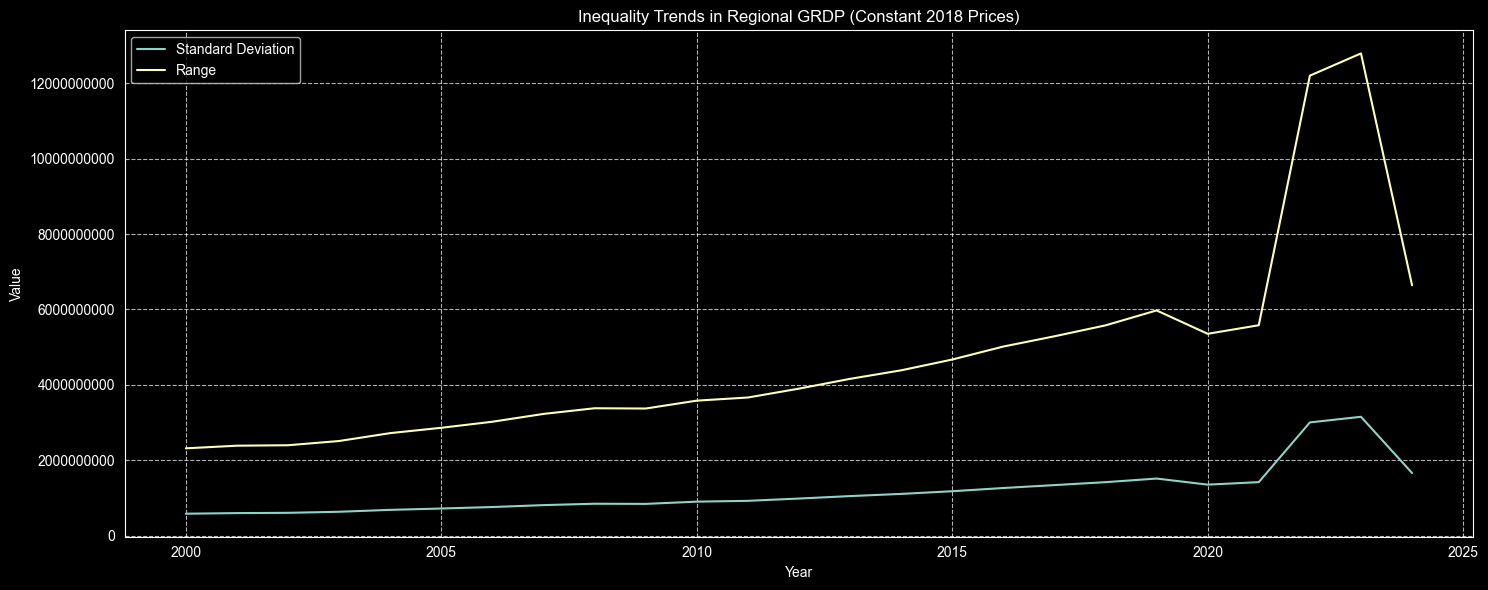

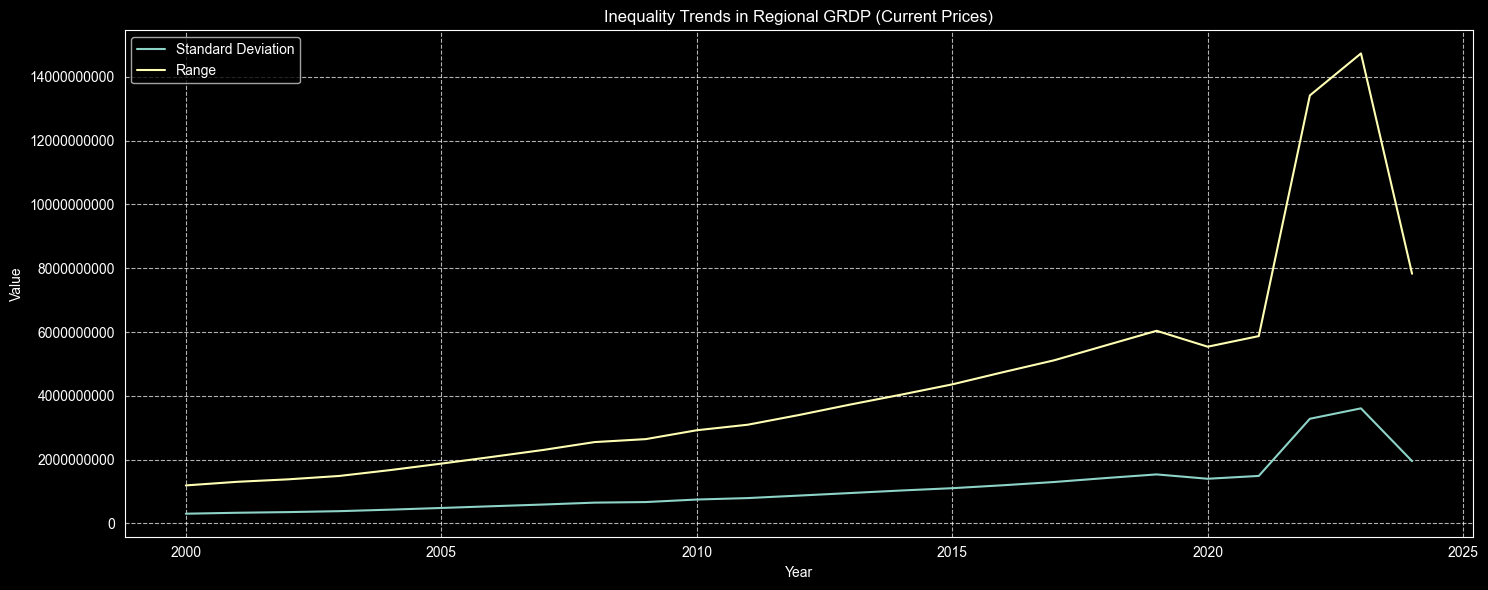

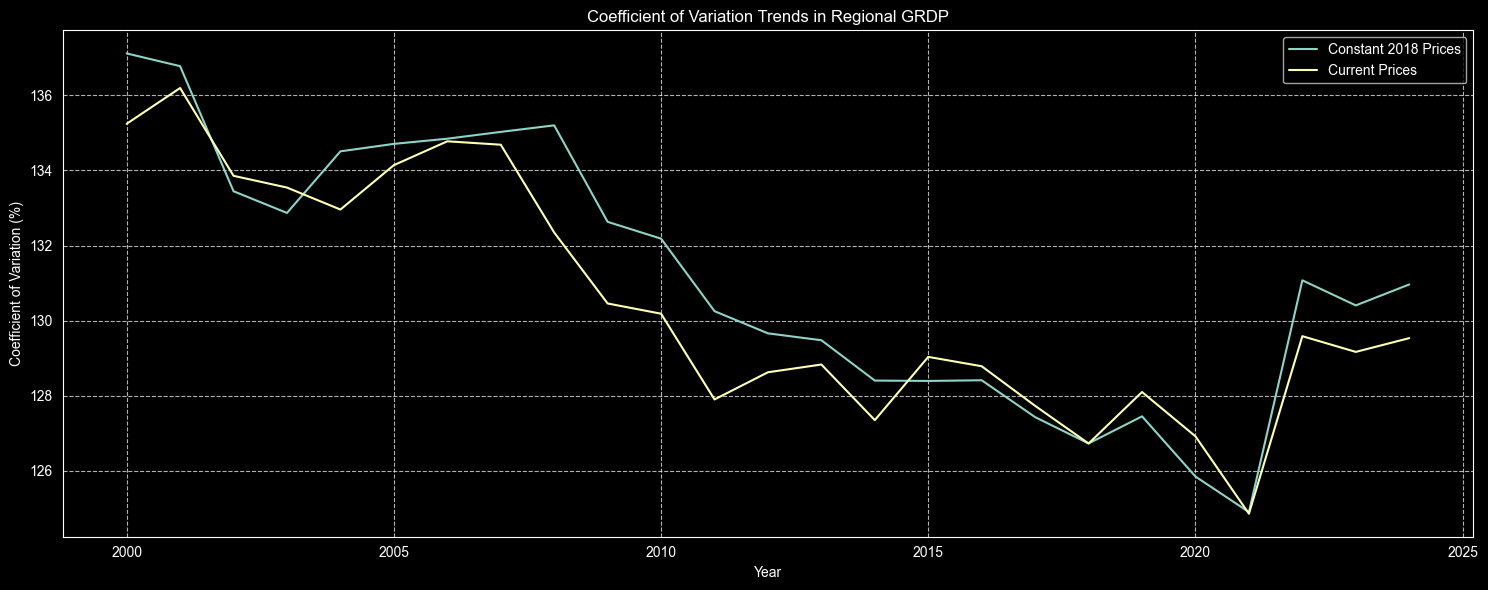

Saved figures to: D:\Quelvin's Files\DATA SCIENCE\outputs\figures


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for Constant 2018 Prices
inequality_constant = inequality_metrics[inequality_metrics['Price_Type'] == 'At Constant 2018 Prices']

# Filter for Current Prices
inequality_current = inequality_metrics[inequality_metrics['Price_Type'] == 'At Current Prices']

plt.figure(figsize=(15, 6))
sns.lineplot(data=inequality_constant, x='Year', y='Standard_Deviation', label='Standard Deviation')
sns.lineplot(data=inequality_constant, x='Year', y='Range', label='Range')
plt.title('Inequality Trends in Regional GRDP (Constant 2018 Prices)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))
sns.lineplot(data=inequality_current, x='Year', y='Standard_Deviation', label='Standard Deviation')
sns.lineplot(data=inequality_current, x='Year', y='Range', label='Range')
plt.title('Inequality Trends in Regional GRDP (Current Prices)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))
sns.lineplot(data=inequality_constant, x='Year', y='Coefficient_of_Variation', label='Constant 2018 Prices')
sns.lineplot(data=inequality_current, x='Year', y='Coefficient_of_Variation', label='Current Prices')
plt.title('Coefficient of Variation Trends in Regional GRDP')
plt.xlabel('Year')
plt.ylabel('Coefficient of Variation (%)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(OUT_FIGS / "DS52_Inequality_Trends_and_Coefficient_of_Variation__in_Regional_GDRP.png", dpi=300)
plt.show()

print("Saved figures to:", OUT_FIGS)

In [26]:
from IPython.display import display
print("Inequality Metrics for Regional GRDP:")
display(inequality_metrics.round(2))

Inequality Metrics for Regional GRDP:


,Year,Price_Type,Minimum,Maximum,Mean,Standard_Deviation,Range,Coefficient_of_Variation
0,2000,At Constant 2018 Prices,96921630.0,2.416392e+09,4.276078e+08,5.863182e+08,2.319470e+09,137.12
1,2000,At Current Prices,45671649.0,1.237451e+09,2.254444e+08,3.048948e+08,1.191779e+09,135.24
2,2001,At Constant 2018 Prices,94136902.0,2.483505e+09,4.405618e+08,6.025857e+08,2.389368e+09,136.78
3,2001,At Current Prices,44751362.0,1.349241e+09,2.455686e+08,3.344517e+08,1.304489e+09,136.19
4,2002,At Constant 2018 Prices,105745055.0,2.507172e+09,4.568500e+08,6.096466e+08,2.401427e+09,133.45
5,2002,At Current Prices,53170834.0,1.435447e+09,2.653576e+08,3.551994e+08,1.382277e+09,133.86
6,2003,At Constant 2018 Prices,110826733.0,2.624052e+09,4.800777e+08,6.378708e+08,2.513226e+09,132.87
7,2003,At Current Prices,57745738.0,1.545712e+09,2.877959e+08,3.843339e+08,1.487966e+09,133.54
8,2004,At Constant 2018 Prices,119223129.0,2.841838e+09,5.117401e+08,6.883346e+08,2.722615e+09,134.51
9,2004,At Current Prices,71276682.0,1.743577e+09,3.248650e+08,4.319356e+08,1.672300e+09,132.96


In [27]:
# 1. Filter df1 for 'At Constant 2018 Prices'
df_constant_grdp = df1[df1['Price_Type'] == 'At Constant 2018 Prices'].copy()

# 2. Filter df1 for 'At Current Prices'
df_current_grdp = df1[df1['Price_Type'] == 'At Current Prices'].copy()

print("Filtered DataFrames created: df_constant_grdp and df_current_grdp")

Filtered DataFrames created: df_constant_grdp and df_current_grdp


In [28]:
df_growth = df1.copy()
df_growth['Growth_Rate'] = df_growth.groupby(['Region', 'Price_Type'])['Total_GRDP'].pct_change() * 100

# Drop NaN values that result from pct_change (first year for each group)
df_growth_cleaned = df_growth.dropna(subset=['Growth_Rate']).copy()

print("Annual Growth Rates Calculated. Sample data:")
display(df_growth_cleaned.head())

df_growth.to_csv(OUT_TABLES / "DS52_Growth_Rate.csv", index=False)

print("Saved tables to:", OUT_TABLES)
print(df_growth)

Annual Growth Rates Calculated. Sample data:


,Region,Year,Price_Type,Total_GRDP,Growth_Rate
2,Bangsamoro Autonomous Region in Muslim Mindanao,2001,At Constant 2018 Prices,94136902.0,-3.959431
3,Bangsamoro Autonomous Region in Muslim Mindanao,2001,At Current Prices,44751362.0,-2.015007
4,Bangsamoro Autonomous Region in Muslim Mindanao,2002,At Constant 2018 Prices,105745055.0,12.331140
5,Bangsamoro Autonomous Region in Muslim Mindanao,2002,At Current Prices,53170834.0,18.813890
6,Bangsamoro Autonomous Region in Muslim Mindanao,2003,At Constant 2018 Prices,110826733.0,4.805594


Saved tables to: D:\Quelvin's Files\DATA SCIENCE\outputs\tables
                                              Region  Year  \
0    Bangsamoro Autonomous Region in Muslim Mindanao  2000   
1    Bangsamoro Autonomous Region in Muslim Mindanao  2000   
2    Bangsamoro Autonomous Region in Muslim Mindanao  2001   
3    Bangsamoro Autonomous Region in Muslim Mindanao  2001   
4    Bangsamoro Autonomous Region in Muslim Mindanao  2002   
..                                               ...   ...   
801                              Zamboanga Peninsula  2022   
802                              Zamboanga Peninsula  2023   
803                              Zamboanga Peninsula  2023   
804                              Zamboanga Peninsula  2024   
805                              Zamboanga Peninsula  2024   

                  Price_Type    Total_GRDP  Growth_Rate  
0    At Constant 2018 Prices  9.801785e+07          NaN  
1          At Current Prices  4.567165e+07          NaN  
2    At Constant 

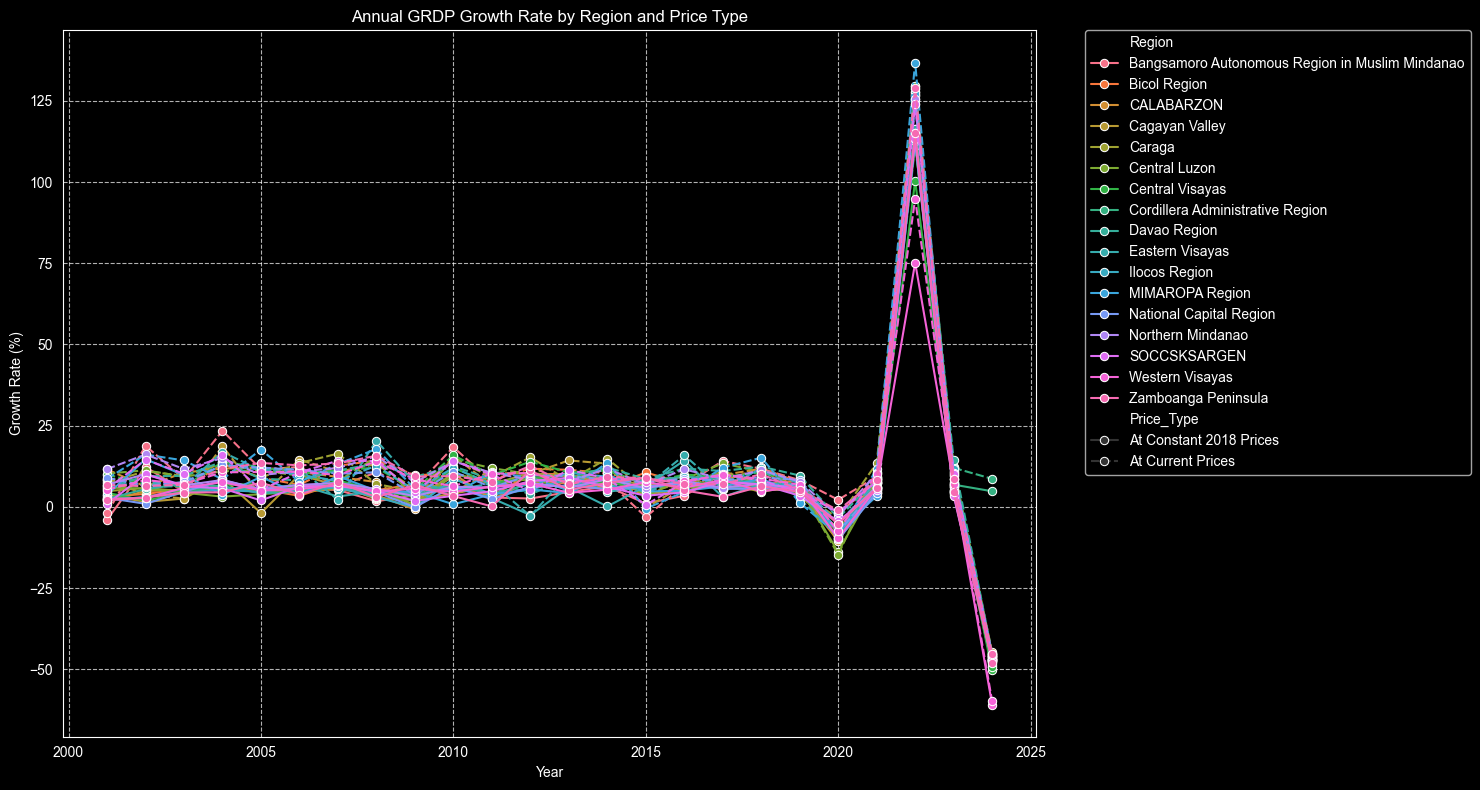

Saved figures to: D:\Quelvin's Files\DATA SCIENCE\outputs\figures


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.lineplot(data=df_growth_cleaned,
             x='Year',
             y='Growth_Rate',
             hue='Region',
             style='Price_Type',
             marker='o')
plt.title('Annual GRDP Growth Rate by Region and Price Type')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.savefig(OUT_FIGS / "DS52_Annual_GDRP_Growth_Rate_by_Region_and_Price_Type.png", dpi=300)
plt.show()

print("Saved figures to:", OUT_FIGS)

In [30]:
volatility_metrics = df_growth_cleaned.groupby(['Region', 'Price_Type'])['Growth_Rate'].agg(
    Mean='mean',
    Standard_Deviation='std'
).reset_index()

volatility_metrics['Coefficient_of_Variation'] = (
    volatility_metrics['Standard_Deviation'] / volatility_metrics['Mean']
) * 100

print("Volatility Metrics for Growth Rates:")

print("Shape:", volatility_metrics.shape)
print("Unique Regions:", volatility_metrics["Region"].nunique())
print("Unique Price Types:", volatility_metrics["Price_Type"].unique())
display(volatility_metrics.head())

Volatility Metrics for Growth Rates:
Shape: (34, 5)
Unique Regions: 17
Unique Price Types: <StringArray>
['At Constant 2018 Prices', 'At Current Prices']
Length: 2, dtype: str


,Region,Price_Type,Mean,Standard_Deviation,Coefficient_of_Variation
0,Bangsamoro Autonomous Region in Muslim Mindanao,At Constant 2018 Prices,7.128908,25.350576,355.602536
1,Bangsamoro Autonomous Region in Muslim Mindanao,At Current Prices,12.029045,28.166691,234.155665
2,Bicol Region,At Constant 2018 Prices,7.897411,25.707478,325.517788
3,Bicol Region,At Current Prices,11.585850,27.579664,238.046111
4,CALABARZON,At Constant 2018 Prices,7.212812,25.721469,356.608057


In [31]:
from IPython.display import display
print("Volatility Metrics for Growth Rates:")
display(volatility_metrics.round(2))

volatility_metrics.to_csv(OUT_TABLES / "DS52_Volatility_Metrics_for_Growth_Rates.csv", index=False)

print("Saved tables to:", OUT_TABLES)
print(volatility_metrics)

Volatility Metrics for Growth Rates:


,Region,Price_Type,Mean,Standard_Deviation,Coefficient_of_Variation
0,Bangsamoro Autonomous Region in Muslim Mindanao,At Constant 2018 Prices,7.13,25.35,355.60
1,Bangsamoro Autonomous Region in Muslim Mindanao,At Current Prices,12.03,28.17,234.16
2,Bicol Region,At Constant 2018 Prices,7.90,25.71,325.52
3,Bicol Region,At Current Prices,11.59,27.58,238.05
4,CALABARZON,At Constant 2018 Prices,7.21,25.72,356.61
5,CALABARZON,At Current Prices,10.45,27.29,261.02
6,Cagayan Valley,At Constant 2018 Prices,7.04,25.83,367.05
7,Cagayan Valley,At Current Prices,10.75,27.74,257.91
8,Caraga,At Constant 2018 Prices,7.90,24.81,314.19
9,Caraga,At Current Prices,11.84,27.37,231.23


Saved tables to: D:\Quelvin's Files\DATA SCIENCE\outputs\tables
                                             Region               Price_Type  \
0   Bangsamoro Autonomous Region in Muslim Mindanao  At Constant 2018 Prices   
1   Bangsamoro Autonomous Region in Muslim Mindanao        At Current Prices   
2                                      Bicol Region  At Constant 2018 Prices   
3                                      Bicol Region        At Current Prices   
4                                        CALABARZON  At Constant 2018 Prices   
5                                        CALABARZON        At Current Prices   
6                                    Cagayan Valley  At Constant 2018 Prices   
7                                    Cagayan Valley        At Current Prices   
8                                            Caraga  At Constant 2018 Prices   
9                                            Caraga        At Current Prices   
10                                    Central Luzon  At 

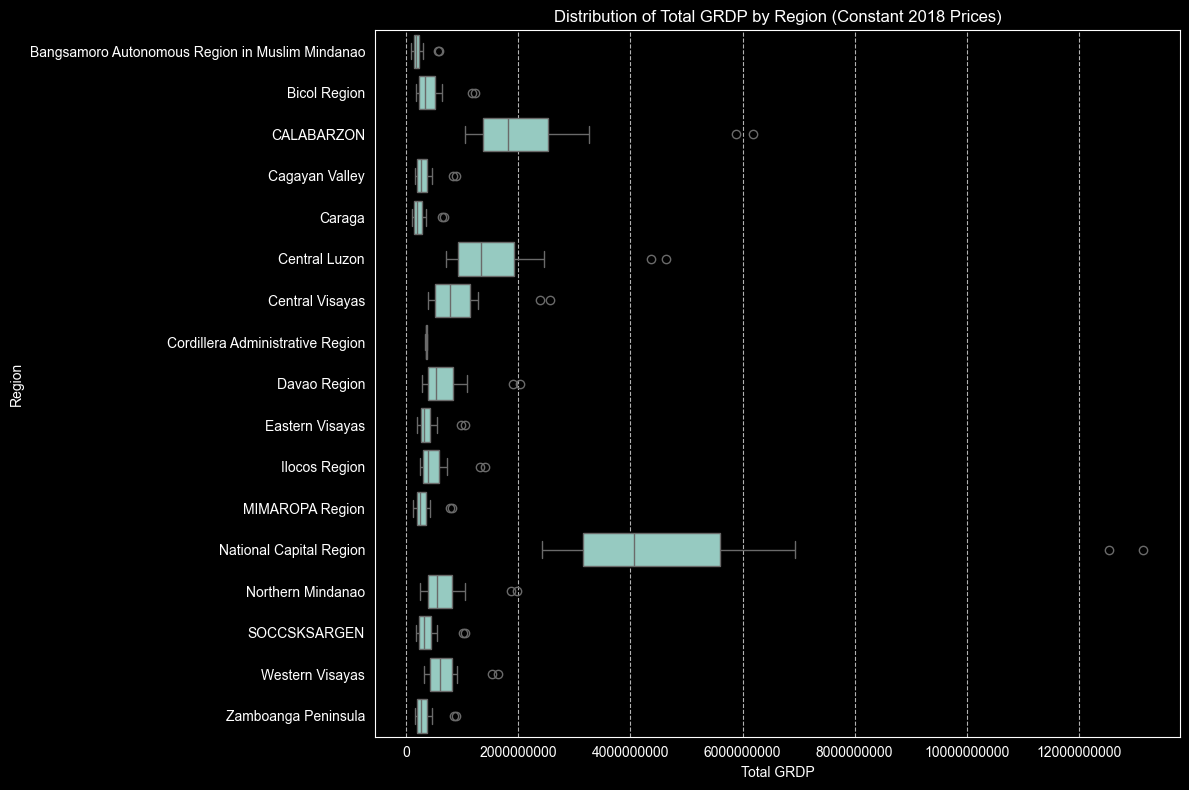

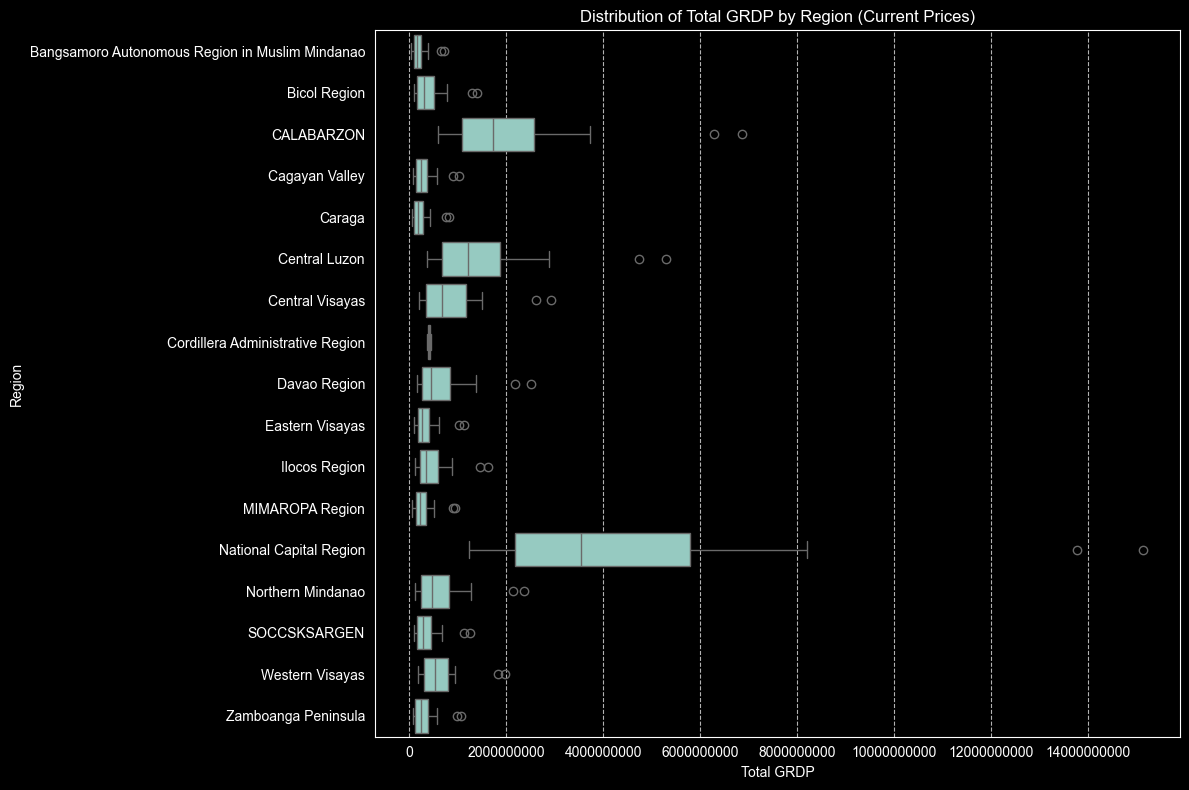

Saved figures to: D:\Quelvin's Files\DATA SCIENCE\outputs\figures


In [32]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_constant_grdp,
            x='Total_GRDP', y='Region')
plt.title('Distribution of Total GRDP by Region (Constant 2018 Prices)')
plt.xlabel('Total GRDP')
plt.ylabel('Region')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_current_grdp,
            x='Total_GRDP', y='Region')
plt.title('Distribution of Total GRDP by Region (Current Prices)')
plt.xlabel('Total GRDP')
plt.ylabel('Region')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.savefig(OUT_FIGS / "DS52_Distribution_of_Total_GDRP_by_Region.png", dpi=300)
plt.show()

print("Saved figures to:", OUT_FIGS)